<a href="https://colab.research.google.com/github/alimoorreza/CS167-notes/blob/main/Day03_Pandas_Practice_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS167: Day03
## Practicing with Pandas

#### CS167: Machine Learning, Fall 2023

Thursday, September 7th, 2023


📆 [Course Schedule](https://analytics.drake.edu/~reza/teaching/cs167_fall23/cs167_schedule.html) | 📜 [Syllabus](https://analytics.drake.edu/~reza/teaching/cs167_fall23/cs167_syllabus_fall23.pdf)

# Pandas Practice Exercises
These are some exercises for you to practice playing around with pandas.
- these are not going to be turned in, they're just practice.
- I'll post solutions tonight

I hope these exercises will leave you in a good spot to tackle Notebook #1.

## Let's get started
Before you begin, make sure that you download the data from Blackboard and put it in your Google Dive wher eyou know how to find it (preferable in a datasets folder).

In [ ]:
#selecting columns in dataframes
import pandas
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import the data:
#make sure the path on the line below corresponds to the path where you put your dataset.
titanic = pandas.read_csv("/content/drive/MyDrive/CS167/datasets/titanic.csv")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# what is the data type of titanic?
type(titanic)

pandas.core.frame.DataFrame

In [ ]:
# what are the features (column titles) of the titanic dataset?
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [ ]:
# display only the 'embark_town' column of the titanic data
titanic.embark_town
#or

titanic['embark_town']

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

In [ ]:
# what is the data type of the result of the previous cell?
type(titanic.embark_town)

pandas.core.series.Series

In [ ]:
# what is the "shape" of the data frame?
titanic.shape

(891, 15)

In [ ]:
# make a subset (call the variable 'subset') of the data that consists of the last 20 rows of the data;
# verify that your subset has 20 rows
subset = titanic[-20:]
subset.shape[0]

20

In [ ]:
# use loc to print out the data for passenger 890 on the titanic dataframe
# use iloc to print out the data for passenger 890 on the subest dataframe
print(subset.loc[890])
print(subset.iloc[19])

survived                0
pclass                  3
sex                  male
age                  32.0
sibsp                   0
parch                   0
fare                 7.75
embarked                Q
class               Third
who                   man
adult_male           True
deck                  NaN
embark_town    Queenstown
alive                  no
alone                True
Name: 890, dtype: object
survived                0
pclass                  3
sex                  male
age                  32.0
sibsp                   0
parch                   0
fare                 7.75
embarked                Q
class               Third
who                   man
adult_male           True
deck                  NaN
embark_town    Queenstown
alive                  no
alone                True
Name: 890, dtype: object


In [ ]:
# use a markdown cell; describe the difference between loc and iloc

# use a markdown cell; describe the difference between loc and iloc
Loc refers to the original name of the row (in this case the overall index), however, iloc refers to the relative index.

While referring to the whole dataset, loc and iloc of the same integer will refer to the same row, but as soon as you start using subsets, iloc will use the indices that are relative to your subset, and loc will use the original indexes that were set when the csv file was read into the notebook.

In [ ]:
# create a subset of the data (call the variable 'queenstown_subset') that consists only of passengers with
# a 'embark_town' that is "Queenstown"
# hint: if you get a warning, you may need to explicitly note that you are making a copy of the original data by using
# the .copy() function

queenstown_subset = titanic[titanic["embark_town"]=='Queenstown']

In [ ]:
# how many passengers are in queenstown_subset?
queenstown_subset.shape[0]

77

In [ ]:
# what is the average fare for all of those in the queenstown_subset?
queenstown_subset.fare.mean()
#queenstown_subset['fare'].mean() #this should also work.

13.276029870129872

In [ ]:
# what is the average age for all of those in the queenstown_subset?
queenstown_subset['age'].mean()
# do all of the passengers have an age recorded? What is recorded if there is no age?
queenstown_subset['age'].isna()   #we can use this and see where the first NA row is, we see that 5 doesn't have any recorded age.
queenstown_subset['age'].loc[5]   #we can get the value of the age of the peron in row 5 to see that it's recorded as nan

nan

In [ ]:
# What does unique(), mean(), isnull(), and fillna() do? Use a markdown cell to write your answers
# Use the Pandas documentation (https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

#unique()
print(titanic['embark_town'].unique()) #unique() prints the unique values in order or appearance

#mean()
print(queenstown_subset['age'].mean()) #mean() takes the average of a numeric series

#isnull()
print(queenstown_subset['age'].isnull())  #isnull() returns a boolean series which indicates whether or not values are missing

#fillna(): will replace missing values with whatever you'd like.

['Southampton' 'Cherbourg' 'Queenstown' nan]
28.089285714285715
5       True
16     False
22     False
28      True
32      True
       ...  
790     True
825     True
828     True
885    False
890    False
Name: age, Length: 77, dtype: bool


In [ ]:
# give examples of your use of unique(), mean(), median(), isnull()
#See above.
titanic['deck'].unique()
titanic['age'].mean()
titanic['age'].median()
titanic['deck'].isnull()

0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: deck, Length: 891, dtype: bool

In [ ]:
# in the queenstown_subet dataframe
# for each row that does not have an age recorded, replace the NaN value with the calculated average
# hint: don't use a loop; it can be done in 1 line of code using fillna()

queenstown_subset['age'].fillna(queenstown_subset['age'].mean())

5      28.089286
16      2.000000
22     15.000000
28     28.089286
32     28.089286
         ...    
790    28.089286
825    28.089286
828    28.089286
885    39.000000
890    32.000000
Name: age, Length: 77, dtype: float64

## Load in the Penguin Dataset:

This is a new dataset, here's the source: https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris
<div>
<img src="https://analytics.drake.edu/~reza/teaching/cs167_fall23/notes/images/day03_penguin.png?raw=1"/ width=500>
</div>

In [ ]:
#make sure the path on the line below corresponds to the path where you put your dataset.
import pandas as pd
penguin = pd.read_csv('/content/drive/MyDrive/CS167/datasets/penguins_size.csv') #'/content/drive/MyDrive/CS167/datasets/titanic.csv'
penguin.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


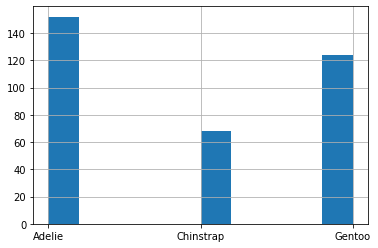

In [ ]:
# make a histogram of the different species of penguins
penguin.species.hist()
# which species of penguin has the most rows in this dataset?
# looking at the histogram, there are more Adelie penguins than Chinstrap or Gentoo

In [ ]:
#find the average culmen length for each species of penguin.
adelie_culmen_avg = penguin[penguin['species']=='Adelie'].culmen_length_mm.mean()
chinstrap_culmen_avg = penguin[penguin['species']=='Chinstrap'].culmen_length_mm.mean()
gentoo_culmen_avg = penguin[penguin['species']=='Gentoo'].culmen_length_mm.mean()
print('Adelie:', adelie_culmen_avg)
print('Chinstrap:', chinstrap_culmen_avg)
print('Gentoo:', gentoo_culmen_avg)

print("======== now, the easy way=============")
# Can you do this in one line? Try using the groupby function (look back at yestedays' notes)
penguin.groupby(['species'])['culmen_length_mm'].mean()

Adelie: 38.79139072847682
Chinstrap: 48.83382352941177
Gentoo: 47.50487804878048
======== now, the easy way=============


species
Adelie       38.791391
Chinstrap    48.833824
Gentoo       47.504878
Name: culmen_length_mm, dtype: float64

In [ ]:
# find the number of Adelie penguins from Torgersen
adelie_torgersen = penguin[(penguin['species']=='Adelie') & (penguin.island=='Torgersen')]
adelie_torgersen.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
#to find the number use the shape of the subset
adelie_torgersen.shape[0]

52

In [ ]:
# what is the percentage of female penguins in the dataset?
penguin.sex.value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [ ]:
num_females = penguin[penguin.sex=='FEMALE'].shape[0]
num_total = penguin.shape[0]
percent_fem = num_females / num_total
percent_fem

0.4796511627906977

In [ ]:
# what is the average weight of male penguins? What about female penguins?
male_penguins = penguin[penguin.sex =='MALE']
male_penguins.body_mass_g.mean()

4545.684523809524

In [ ]:
# Which species of penguin is the heaviest? Which is the smallest?
results = penguin.groupby(['species'])['body_mass_g'].mean()
results
# look into the documentation and see what the following functions do:
# min(), max(), idxmax()
# see if you can use them to help answer the question

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

In [ ]:
results.max()

5076.016260162602

In [ ]:
results.idxmax()

'Gentoo'

In [ ]:
# come up with 2 of your own questions that you think you can answer with the penguin dataset,
# and use the tools you have to answer them.